In [4]:
import statsmodels.api as sm

In [5]:
import sklearn as sk

w:
 14.33532874090464


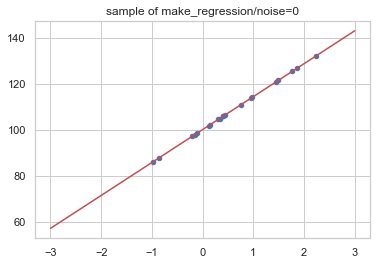

In [8]:
from sklearn.datasets import make_regression

X, y, w = make_regression(
    n_samples = 20, n_features = 1, bias = 100, noise= 0, coef=True, random_state = 0
)
print("w:\n", w)

xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
plt.plot(xx, y0, 'r-')
plt.scatter(X, y, s = 20)
plt.title('sample of make_regression/noise=0')
plt.show()
%matplotlib inline

In [11]:
from scipy.stats import uniform
def make_regression2(n_samples, n_features, bias, noise, random_state = 0):
    np.random.seed(random_state)
    X = np.random.uniform.rvs(size=100, loc = 10, scale=20)
    w = 100 * y
    y0
    e = np.random.norm(size=5, bias, noise)
    y
    return X, y, w

SyntaxError: positional argument follows keyword argument (<ipython-input-11-7123ed9cd9bc>, line 7)

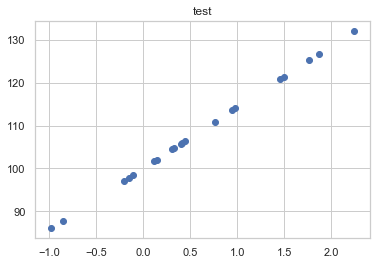

In [13]:
plt.scatter(X, y)
plt.title('test')
plt.show()


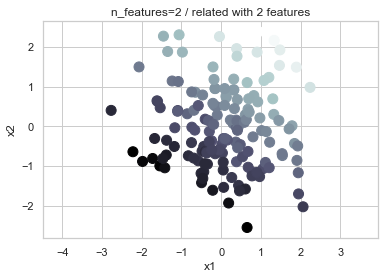

In [16]:
X, y, w = make_regression(
        n_samples = 150, n_features = 2, noise = 10, coef = True, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.title("n_features=2 / related with 2 features")
plt.show()

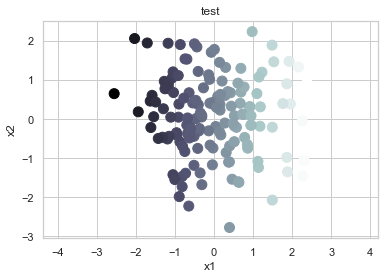

In [19]:
X, y, w = make_regression(
        n_samples = 150, n_features = 2, n_informative=1, noise = 0, coef = True, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone )
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis("equal")
plt.title('test')
plt.show()

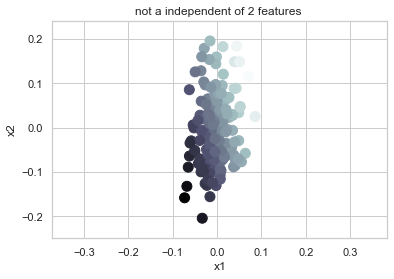

In [22]:
X, y, w = make_regression(
    n_samples=150, n_features=2, effective_rank=1, noise=0, coef=True, random_state=0,
    tail_strength=0
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("not a independent of 2 features ")
plt.show()

# basic of regression analysis

### Bais augmentation

<img src="resources/bais_augmentation.png" width="600" height="300" align="center"/>

In [3]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=2,
                             bias=100, noise=10, coef=True, random_state=1)

In [4]:
# raw data
X0[:5]

array([[ 0.0465673 ,  0.80186103],
       [-2.02220122,  0.31563495],
       [-0.38405435, -0.3224172 ],
       [-1.31228341,  0.35054598],
       [-0.88762896, -0.19183555]])

In [5]:
# Bais augmentation
X = np.hstack([np.ones((X0.shape[0], 1)), X0])
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

In [8]:
# statsmodels add_constant
import statsmodels.api as sm

X = sm.add_constant(X0)
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

# OLS

In [11]:
from sklearn.datasets import make_regression
bias = 100
X0, y, w = make_regression(
        n_samples = 200, n_features=1, bias = bias, noise = 10, coef= True, random_state=1)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [12]:
w

array(86.44794301)

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X0, y)
print(model.coef_, model.intercept_)

[[86.96171201]] [99.79150869]


In [14]:
model.predict([[3]])

array([[360.67664473]])

In [15]:
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Thu, 14 May 2020   Prob (F-statistic):          8.17e-182
Time:                        22:26:09   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7915      0.705    141.592      0.0

In [16]:
result.predict([[1, 3]])

array([360.67664473])

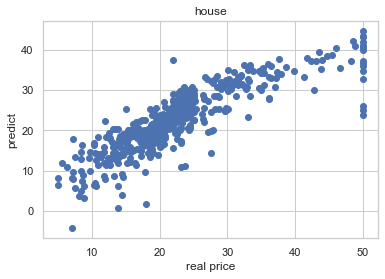

In [23]:
from sklearn.datasets import load_boston

boston = load_boston()
model_boston = LinearRegression().fit(boston.data, boston.target)
predictions = model_boston.predict(boston.data)

plt.scatter(boston.target, predictions)
plt.xlabel(u"real price")
plt.ylabel(u"predict")
plt.title("house")
plt.show()
%matplotlib inline

In [24]:
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 14 May 2020   Prob (F-statistic):          6.72e-135
Time:                        22:28:48   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [25]:
result_boston2.params

const      36.459488
CRIM       -0.108011
ZN          0.046420
INDUS       0.020559
CHAS        2.686734
NOX       -17.766611
RM          3.809865
AGE         0.000692
DIS        -1.475567
RAD         0.306049
TAX        -0.012335
PTRATIO    -0.952747
B           0.009312
LSTAT      -0.524758
dtype: float64

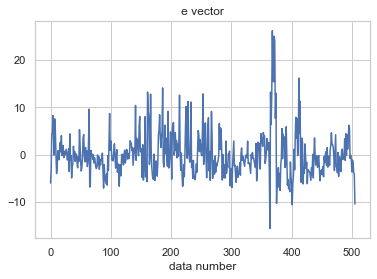

In [26]:
result_boston2.resid.plot()
plt.title("e vector")
plt.xlabel("data number")
plt.show()

In [27]:
result_boston2.resid.sum()

3.247180302423658e-12

<img src= resources/vector.png width="600" height="300" align="center"/>

# Partial Regression Plot

In [30]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()

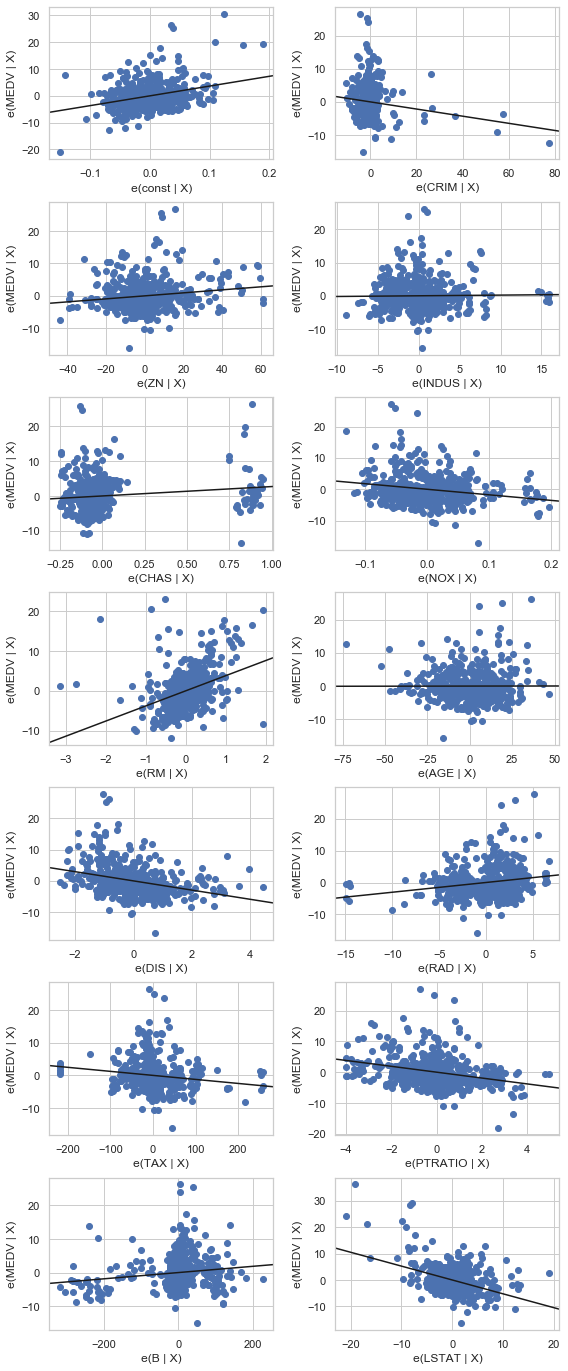

In [31]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

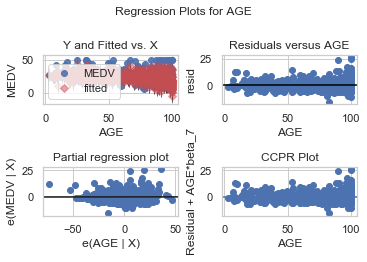

<Figure size 1080x1440 with 0 Axes>

In [46]:

fig = sm.graphics.plot_regress_exog(result_boston, "AGE")

plt.tight_layout(pad=4, h_pad=0.5, w_pad=0.5)
plt.figure(figsize=(15, 20))
plt.show()

In [47]:
dfX2 = dfX.copy()
dfX2["TAX"] *= 1e13
df2 = pd.concat([dfX2, dfy], axis=1)

model2 = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data=df2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     83.39
Date:                Thu, 14 May 2020   Prob (F-statistic):           8.62e-44
Time:                        22:50:56   Log-Likelihood:                -1737.9
No. Observations:                 506   AIC:                             3484.
Df Residuals:                     502   BIC:                             3501.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0038      0.000     -8.543      0.0